In [0]:
import numpy as np

In [0]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)



In [0]:
X, y = mnist["data"], mnist["target"]

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [0]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [0]:
X_train, X_val, X_test, y_train, y_val, y_test = X[:60000], X[:10000], X[60000:], y[:60000], y[:10000], y[60000:]

In [0]:
# Multilabel classification
from sklearn.neighbors import KNeighborsClassifier

(None, '5')

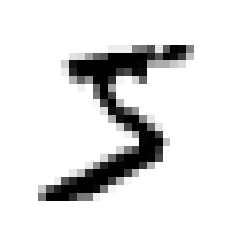

In [8]:
plot_digit(X_train[0]), y[0]

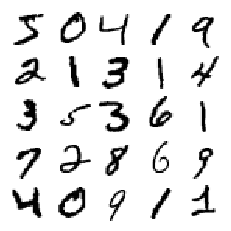

In [9]:
plot_digits(X_train[:25], images_per_row=5)

In [10]:
# Grid Search for KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV

parameters = {'weights': ('uniform','distance'), 'n_neighbors':[3, 5, 7, 9, 11, 13]}

knn_clf = KNeighborsClassifier()

knn_grid_search = GridSearchCV(knn_clf, parameters, cv=5, verbose=3)


knn_grid_search.fit(X_val, y_val)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... n_neighbors=3, weights=uniform, score=0.940, total=  27.2s
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.2s remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.943, total=  27.0s
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   54.2s remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.948, total=  26.9s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.933, total=  26.7s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.934, total=  26.5s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.942, total=  26.3s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.947, total=  26.2s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.951, total=  26.2s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.937, total=  26.4s
[CV] n_neighbors=3, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 26.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13],
                         'weights': ('uniform', 'distance')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [11]:
knn_grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [12]:
knn_grid_search.best_score_

0.9423999999999999

In [19]:
best_knn_clf = KNeighborsClassifier(**knn_grid_search.best_params_)
best_knn_clf.fit(X_train, y_train)
#params = knn_grid_search.best_params_

#forest_clf = RandomForestClassifier(random_state=42)
#y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [20]:
from sklearn.metrics import accuracy_score

y_pred = best_knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9717